In [2]:
import MeCab
import json
import sqlite3
import requests
import records
from bs4 import BeautifulSoup
import glob
import json
import urllib.parse
import re
import MeCab as mc
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [3]:
conn = None

def connect():
    global conn
    conn = sqlite3.connect('./sample.db')
    
def close():
    conn.close()
    
def create_table():
    conn.execute('DROP TABLE IF EXISTS countries')
    conn.execute('''CREATE TABLE countries(
    id               INTEGER PRIMARY KEY AUTOINCREMENT,
    contry_name      TEXT,
    content          TEXT
    )''')


In [4]:
connect()
create_table()
close()

In [5]:
def load(name, content):
    conn.execute(
    'INSERT INTO countries (contry_name, content) VALUES (?,?)', (name, content))
    conn.commit()
    
# def get(doc_id, fl):
#     row_ls = conn.execute(
#     'SELECT {} FROM docs WHERE id = ?'.format(','.join(fl)),
#     (doc_id,)).fetchone
    
#     row_dict = {}
#     for key, value in zip(fl, row_ls):
#         row_dict[key] = value
#     return row_dict

# def get_all_ids(limit, offset=0):
#     return [record[0] for record in conn.execute(
#     'SELECT id FROM docs LIMIT ? OFFSET ?', (limit,offset))]

In [6]:


url = "https://ja.wikipedia.org/wiki/%E5%9B%BD%E3%81%AE%E4%B8%80%E8%A6%A7"
header = "https://ja.wikipedia.org"
r = requests.get(url)
bs = BeautifulSoup(r.content,'html.parser')

# _渡辺さんのウェブスクレイピングコード

table = bs.find('table', class_='wikitable')

connect()
create_table()


for tr in table.find_all('tr'): 
#     list
    a = tr.find_all("a")
    if a:
        name = a[1].text
        link = a[1].get("href")
        
        res = requests.get(header + link)
        load(name, res.text)

# 李さんのウェブスクレイピングコード    

# for items in bs.find_all('b'):
#      next_row = items.
#         if next_row:
            
# item_name_first = items.find_next_sibling('title')

# for contries in html_soup.find_all("b"):
#        next_row = contries.find_next_sibling("b")
# #     print(next_row)
#        if next_row:
#         contry_link_row = next_row.find("a")
# #         国別アドレスを抽出
#         contry_name = contry_link_row.get("title")
# #         print(contry_name)
#         contry_link = base_url + contry_name
# #         contry_links.append(contry_link)

#         contry_html = requests.get(contry_link).text

# #         print(contry_html_soup.text)

#         load(contry_name,contry_html)


# print(values)

# print(contry_links)

# 自分のコード
#     item_link = item.get('href')
#     if next_row:
#         = items.find_next_sibling('href')
# print(items_link)
# #     items_td = items_tr.find("td") 
# #     item_link = item_td.get('href')

close()

In [7]:
# data内容を表す
con = None
#和数据库链接
con = sqlite3.connect("./sample.db")
# cursor是光标扫描的意思
cursor = con.cursor()
# 数据抽出
res = cursor.execute("SELECT content FROM countries")
print(res)

# タプルから出します
bs = BeautifulSoup(cursor.fetchall()[192][0], "html.parser")

In [50]:
content = bs.find("div", id="content").text
text = re.sub("[\n,\xa0,]","",content)
text = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
# text = re.sub("[編集,参照,現在,以上,詳細,parser,output,th,それ,よう,こと,ため,ほか,もの,である，英語版，いつ,閲覧，なお，日本]", "",text)
stop_words = [ u'編集', u'参照', u'現在', u'以上', u'output', u'parser', u'詳細', u'英語版', u'閲覧', u'日本', u'ppp', u'th', u'注釈', u'を', u'せる',
              u'した',  u'思う', u'それ', u'ここ', u'ちゃん', u'くん', u'']         
print(text)

ロシア出典: フリー百科事典『ウィキペディア（Wikipedia）』ナビゲーションに移動検索に移動この項目では、1991年に成立したロシア連邦について説明しています。その他の国家・政体・歴史的ロシアについては「ロシア (名称)」をご覧ください。ロシア連邦Российская Федерация（国旗）（国章）国の標語：なし国歌： Госуда́рственный гимн Росси́йской Федера́ции（ロシア語）ロシア連邦国歌公用語ロシア語[注記 1]首都モスクワ最大の都市モスクワ政府大統領ウラジーミル・プーチン首相ドミートリー・メドヴェージェフ連邦院議長ワレンチナ・マトヴィエンコ国家院議長ヴャチェスラフ・ヴォロージン面積総計17098246km2（1位）水面積率0.5%人口総計（2017年）146804400人（9位）[1]人口密度8.5人/km2GDP（自国通貨表示）合計（2013年）66兆7553億[2]ロシア・ルーブルGDP (MER)合計（2013年）2兆968億[2]ドル（8位）GDP (PPP)合計（2013年）3兆4916億[2]ドル（6位）1人あたり24298[2]ドル建国モスクワ大公国（ロシア帝国の基礎）1263年ロシア・ツァーリ国（ロシア帝国の前身）1547年1月16日ロシア帝国1721年10月22日ロシア臨時政府（二月革命により成立）1917年3月16日ロシア・ソビエト連邦社会主義共和国（十月革命により成立）1917年11月7日ソ連崩壊によりソビエト連邦の継承国として独立1991年12月25日通貨ロシア・ルーブル (RUB)時間帯UTC +2 - +12（DST：なし）ISO 3166-1RU / RUSccTLD.ru.рф国際電話番号7^ 連邦構成主体の各共和国は連邦公用語（ロシア語）とは別に、自らの公用語を定めうることが憲法で認められている。ロシア連邦（ロシアれんぽう、ロシア語: Российская Федерация：英語名 Russian Federation）、またはロシア (Россия) は、ユーラシア大陸北部にある共和制および連邦制国家。目次1 概要2 国名2.1 歴史的な国名2.2 国名の日本語表記の変遷3 歴史3.1 古代・中世3.2 ロシア帝国3.3 ソビエト連邦3.4 ロシア連邦3.4.1 成立と脱

In [37]:

m = mc.Tagger ("-ochasen")
print(m.parse (text))

アイスランド	名詞,固有名詞,地域,国,*,*,アイスランド,アイスランド,アイスランド
出典	名詞,一般,*,*,*,*,出典,シュッテン,シュッテン
:	名詞,サ変接続,*,*,*,*,*
フリー	名詞,一般,*,*,*,*,フリー,フリー,フリー
百科	名詞,一般,*,*,*,*,百科,ヒャッカ,ヒャッカ
事典	名詞,一般,*,*,*,*,事典,ジテン,ジテン
『	記号,括弧開,*,*,*,*,『,『,『
ウィキペディア	名詞,一般,*,*,*,*,*
（	記号,括弧開,*,*,*,*,（,（,（
Wikipedia	名詞,固有名詞,組織,*,*,*,*
）	記号,括弧閉,*,*,*,*,）,）,）
』	記号,括弧閉,*,*,*,*,』,』,』
ナビゲーション	名詞,一般,*,*,*,*,*
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
移動	名詞,サ変接続,*,*,*,*,移動,イドウ,イドー
検索	名詞,サ変接続,*,*,*,*,検索,ケンサク,ケンサク
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
移動	名詞,サ変接続,*,*,*,*,移動,イドウ,イドー
アイスランド	名詞,固有名詞,地域,国,*,*,アイスランド,アイスランド,アイスランド
共和	名詞,一般,*,*,*,*,共和,キョウワ,キョーワ
国	名詞,接尾,一般,*,*,*,国,コク,コク
Ísland	名詞,一般,*,*,*,*,*
（	記号,括弧開,*,*,*,*,（,（,（
国旗	名詞,一般,*,*,*,*,国旗,コッキ,コッキ
）(	名詞,サ変接続,*,*,*,*,*
国	名詞,接尾,一般,*,*,*,国,コク,コク
章	名詞,固有名詞,人名,名,*,*,章,アキラ,アキラ
)	名詞,サ変接続,*,*,*,*,*
国	名詞,接尾,一般,*,*,*,国,コク,コク
の	助詞,連体化,*,*,*,*,の,ノ,ノ
標語	名詞,一般,*,*,*,*,標語,ヒョウゴ,ヒョーゴ
：	記号,一般,*,*,*,*,：,：,：
なし	動詞,自立,*,*,五段・サ行,連用形,なす,ナシ,ナシ
国歌	名詞,一般,*,*,*,*,国歌,コッカ,コッカ
：	記号,一般,*,*,*,*,：,：,：
Lofsöngur	名詞,固有名詞,組織,*,*,*,*
（	記号,括弧開,*,*,*,*,（,（,（
アイス

In [3]:
# パソコンの中に辞書を使って、分析してください
m = mc.Tagger ("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
print(m.parse ("新国立美術館"))

新国立美術館	名詞,固有名詞,一般,*,*,*,新国立美術館,シンコクリツビジュツカン,シンコクリツビジュツカン
EOS



In [38]:
def mecab_analysis(texts):
    t = mc.Tagger("")
    t.parse('')
    output = []
    node =  t.parseToNode(texts)  
    while node:
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ['名詞']:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

In [39]:
word = Counter(mecab_analysis(text))

In [40]:
# dic x:x[1]，用item`取出来，然后用lambda一次性代表变数的名字
a = sorted(Counter(mecab_analysis(text)).items(),key=lambda x:x[1], reverse=True)

In [77]:

" ".join( mecab_analysis(text))
stop_words = [ u'編集', u'を参照', u'現在', u'以上', u'output', u'parser', u'詳細は', u'英語版', u'2018年3月22日閲覧', u'日本語', u'ppp', u'th', u'注釈', u'ただし', u'いつ',
              u'cs1',  u'思う', u'しかし', u'9px', u'なお', u'また', u'mw',u'を参照この節の加筆が望まれてます',u'2016年10月18日閲覧']  
fpath = "/home/r-ei/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
wordcloud = WordCloud(
    background_color="pink",
    font_path=fpath,
    width=800,
    max_words=100,
    collocations=False,
    height=600,
    stopwords=set(stop_words)).generate(text)

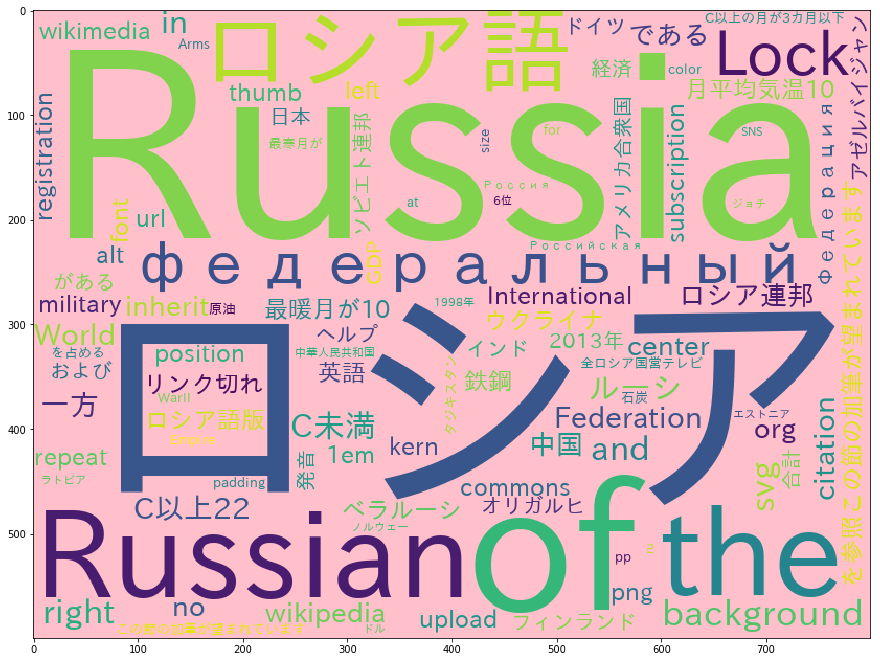

In [78]:

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)